In [1]:
import sys
sys.path.append('../')
import healpy as hp
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from lbxs4 import CMBLensed
from lbxs4.foreground import Foregrounds
from lbxs4.noise import NoiseModel
from lbxs4.simulations import LBSky,S4Sky
from lbxs4.instrument import LiteBIRD

# CMB simulations

In [3]:
c = CMBLensed(nside=1024)

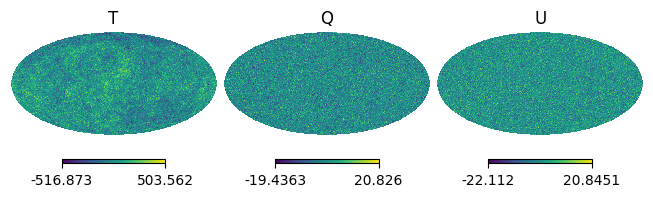

In [4]:
tqu = c.TQU(0)
hp.mollview(tqu[0], title='T', sub=(1,3,1))
hp.mollview(tqu[1], title='Q', sub=(1,3,2))
hp.mollview(tqu[2], title='U', sub=(1,3,3))

# LiteBIRD configuration

In [5]:
# Tags
LiteBIRD().tag

array(['H3-402', 'H2-337', 'H1-280', 'H2-235', 'H1-195', 'M1-195',
       'M2-166', 'M1-140', 'M2-119', 'M1-100', 'L4-140', 'L3-119',
       'L4-100', 'L2-089', 'L3-089', 'L1-078', 'L4-078', 'L2-068',
       'L3-068', 'L1-060', 'L2-050', 'L1-040'], dtype='<U6')

In [6]:
# Beam
LiteBIRD().get_fwhm('L1-078')

43.8

In [7]:
# Center frequency
LiteBIRD().get_frequency('L1-078')

78.0

# LiteBIRD noise model

In [8]:
N = NoiseModel()

In [9]:
N.noise_freq('L4-078',idx=0)

array([[ 4.91856020e-07,  6.36431630e-07,  2.58039286e-06, ...,
        -1.56774918e-07, -8.26520605e-07,  7.03035877e-07],
       [-2.61457702e-06,  2.03543733e-06, -5.12035366e-07, ...,
         1.10857393e-07,  4.57757944e-07,  4.61831994e-07],
       [ 6.57741901e-07,  3.11816347e-07,  3.40324833e-07, ...,
        -6.59235634e-08, -6.67982191e-06, -7.26891066e-07]])

# Foreground model

In [10]:
dir_downgrade =  '/pscratch/sd/l/lonappan/LBxS4'
fg = Foregrounds(dir_downgrade,1024,complexity='medium')

In [11]:
ftqu = fg.TQU('H3-402')

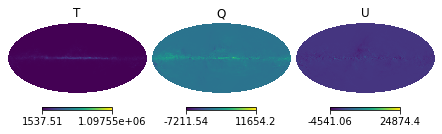

In [12]:
hp.mollview(ftqu[0], title='T', sub=(1,3,1))
hp.mollview(ftqu[1], title='Q', sub=(1,3,2))
hp.mollview(ftqu[2], title='U', sub=(1,3,3))

# LiteBIRD Sky 
## CMB + noise + foreground ---> Harmonic ILC/ Needlet ILC

In [6]:
lbsky = LBSky(512)

In [14]:
# Harmonic
#alms = lb.HILC(0)
#ncl = lb.HILC_ncl(0)

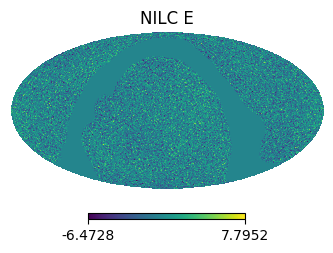

In [8]:
hp.mollview(hp.alm2map(lbsky.NILC_Elm(0),256),sub=(1,2,1),title='NILC E')

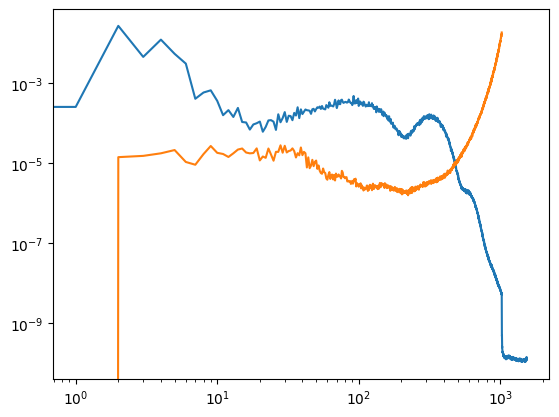

In [16]:
plt.loglog(hp.alm2cl(lbsky.NILC_Elm(0)),label='E NILC')
plt.loglog(lbsky.NILC_ncl(0),label='noise NILC')

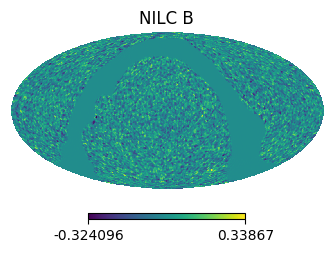

In [15]:
hp.mollview(hp.alm2map(lbsky.NILC_Blm(0),64),sub=(1,2,2),title='NILC B')

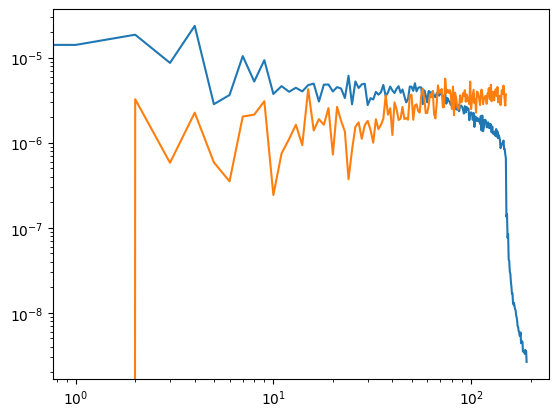

In [17]:
plt.loglog(hp.alm2cl(lbsky.NILC_Blm(0)),label='B NILC')
plt.loglog(lbsky.NILC_nclb(0),label='noise NILC')

# CMB-S4 Sky
## CMB + noise + foreground ---> Needlet ILC

In [11]:
s4sky = S4Sky(nside=1024)

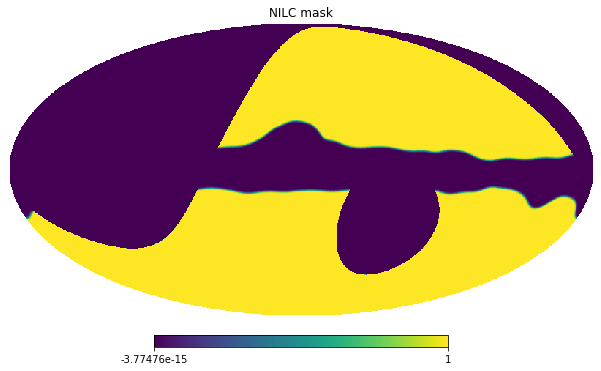

In [4]:
hp.mollview(s4sky.nilc_mask,title='NILC mask')

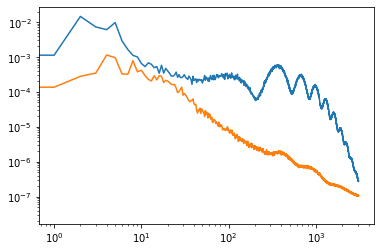

In [5]:
plt.loglog(hp.alm2cl(s4sky.NILC_Elm(0)),label='E NILC')
plt.loglog(s4sky.NILC_ncl(0),label='noise NILC')

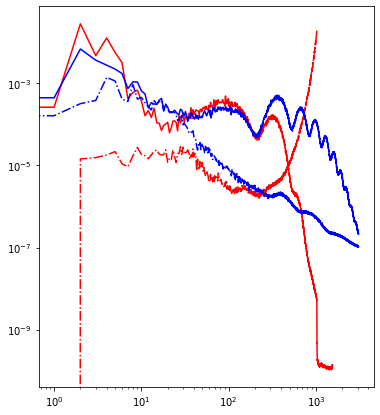

In [7]:
plt.figure(figsize=(6,7))
plt.loglog(hp.alm2cl(lbsky.NILC_Elm(0)),label='E NILC',c='r')
plt.loglog(lbsky.NILC_ncl(0),label='noise NILC',c='r',ls='-.')
plt.loglog(hp.alm2cl(s4sky.NILC_Elm(0)),label='E NILC',c='b')
plt.loglog(s4sky.NILC_ncl(0),label='noise NILC',c='b',ls='-.')

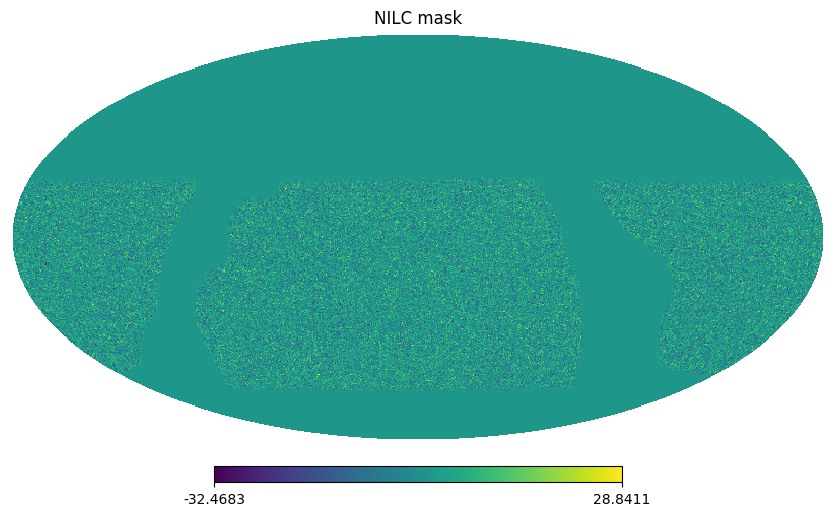

In [12]:
hp.mollview(hp.alm2map(s4sky.NILC_Elm(0),nside=128),title='NILC mask')